In [ ]:

# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

%matplotlib inline


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer


In [ ]:
# load the dataframe

df = pd.read_csv('diabetes.csv' )
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check if there are null values

df.isnull().values.any()

False

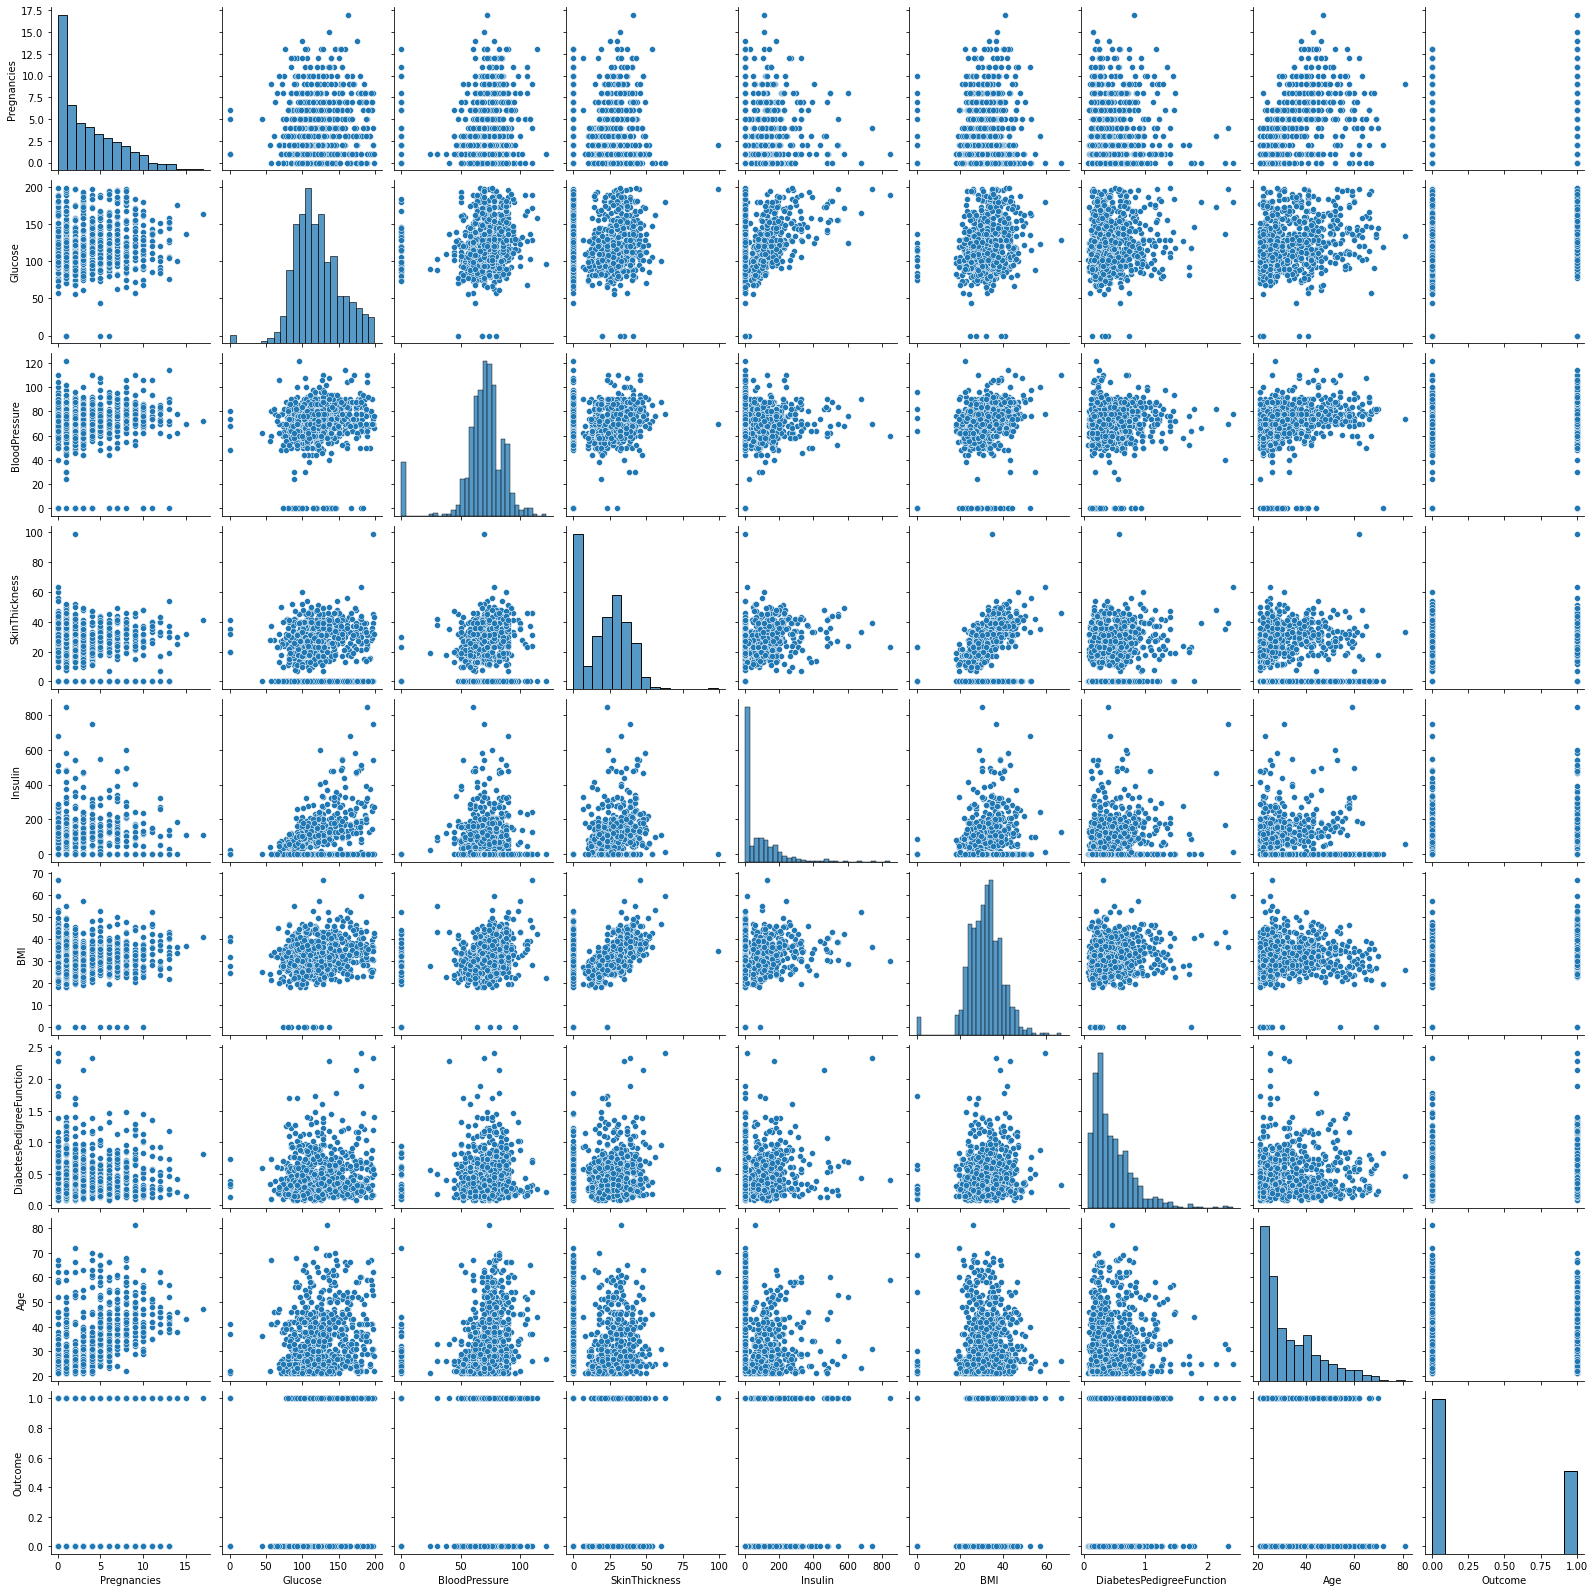

In [ ]:
# pairplot to visualize my dataset
sns.pairplot(df)

In [ ]:
# Get correlation of each features in the dataset
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


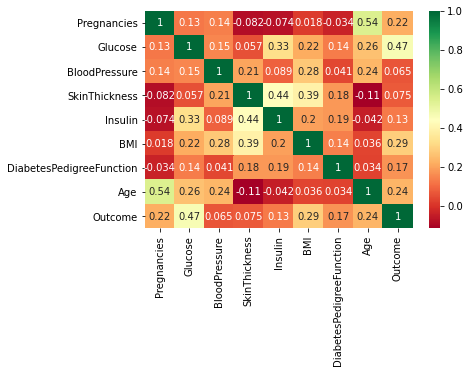

In [ ]:
# plot the heatmap

g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
df.corr()

In [ ]:
# Check if the dataset is balanced

diabetes_true_count = len(df.loc[df["Outcome"]==True])
diabetes_false_count = len(df.loc[df["Outcome"]==False])

(diabetes_true_count, diabetes_false_count)


(268, 500)

In [ ]:
# split the features from the targets
#features = df.drop('Outcome', axis=1)
#target = df['Outcome']

In [ ]:
# split the dataset into feature and label variable
feature_cols = ['Pregnancies', 'Insulin', 'BloodPressure','BMI','Glucose','Age', 'SkinThickness', 'DiabetesPedigreeFunction']
predicted_class = ['Outcome']
X = df[feature_cols].values
y = df[predicted_class].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
# Do imputation to the missing values

fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
# Create pipeline
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(solver='lbfgs'))

In [ ]:
# Instantiate the model
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the output for our model

y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
X_test

array([[4.00000000e+00, 1.26000000e+02, 7.20000000e+01, ...,
        3.70000000e+01, 2.90000000e+01, 3.38000000e-01],
       [2.00000000e+00, 1.60000000e+02, 8.60000000e+01, ...,
        2.80000000e+01, 4.20000000e+01, 2.46000000e-01],
       [1.00000000e+00, 1.40437500e+02, 5.40000000e+01, ...,
        6.20000000e+01, 2.99921875e+01, 6.87000000e-01],
       ...,
       [6.00000000e+00, 1.40437500e+02, 6.60000000e+01, ...,
        2.90000000e+01, 2.99921875e+01, 2.49000000e-01],
       [1.00000000e+00, 6.10000000e+01, 7.40000000e+01, ...,
        2.10000000e+01, 2.20000000e+01, 2.56000000e-01],
       [4.64375000e+00, 2.65000000e+02, 7.80000000e+01, ...,
        5.80000000e+01, 3.20000000e+01, 1.15900000e+00]])

In [ ]:
# To improve accuracy import the metrics class to create confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[107,  14],
       [ 34,  37]])

([<matplotlib.axis.YTick at 0x7f82cd9f02b0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

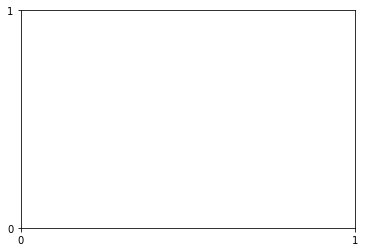

In [ ]:
# plot the confusion matrix

class_names = [0,1] # names of classes
ax = plt.subplots
tick_marks = np.arange (len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 15.0, 'Predicted label')

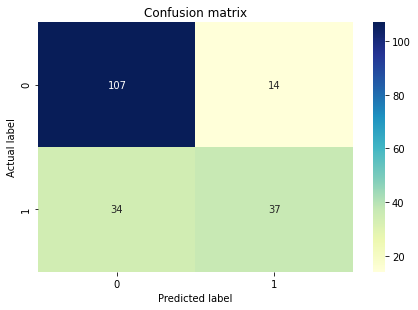

In [ ]:
# Create a heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.tight_layout()
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# test accuracy

accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy = ", accuracy * 100, "%")





accuracy =  75.0 %


In [ ]:
# Save the model
if not os.path.exists('models'):
  os.makedirs('models')

MODEL_PATH = "models/logistic_reg.save"
pickle.dump(logreg, open(MODEL_PATH,'wb'))
